# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 

## Lecture 14 (PCA and High Dimensionality)

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>


---

In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt

#     import statsmodels.api as sm
#     from statsmodels.tools import add_constant
#     from statsmodels.regression.linear_model import RegressionResults
#     import seaborn as sns
#     from sklearn.preprocessing import MinMaxScaler
#     from sklearn.model_selection import KFold
#     from sklearn.linear_model import LinearRegression
#     from sklearn.linear_model import Ridge
#     from sklearn.linear_model import Lasso
#     from sklearn.preprocessing import PolynomialFeatures
#     from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# sns.set(style="ticks")
# %matplotlib inline

In [2]:
heart_df = pd.read_csv('data/Heart.csv')

In [3]:
print(heart_df.shape)
heart_df.head()

(303, 15)


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
heart_df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [5]:
# For pedagogical purposes, let's simplify our lives and use just 4 predictors
X = heart_df[['Age','RestBP','Chol','MaxHR']]
y = 1*(heart_df['AHD']=='Yes')

In [6]:
#fit the 'full' model on the 4 predictors. and print out the coefficients
logit_full = LogisticRegression(C=1000000,solver="lbfgs").fit(X,y)

beta = logit_full.coef_[0]

print(beta)

[ 0.00493155  0.01649623  0.00312672 -0.04328668]


In [7]:
# investigating what happens when two identical predictors are used

logit1 = LogisticRegression(C=1000000,solver="lbfgs").fit(heart_df[['Age']],y)
logit2 = LogisticRegression(C=1000000,solver="lbfgs").fit(heart_df[['Age','Age']],y)

print("The coef estimate for Age (when in the model once):",logit1.coef_)
print("The coef estimates for Age (when in the model twice):",logit2.coef_)

The coef estimate for Age (when in the model once): [[0.05198618]]
The coef estimates for Age (when in the model twice): [[0.02599311 0.02599311]]


In [8]:
X = heart_df[['Age','RestBP','Chol','MaxHR']]

# create/fit the 'full' pca transformation
pca = PCA().fit(X)

# apply the pca transformation to the full predictor set
pcaX = pca.transform(X)

# convert to a data frame
pcaX_df = pd.DataFrame(pcaX, columns=[['PCA1' , 'PCA2', 'PCA3', 'PCA4']])

# here are the weighting (eigen-vectors) of the variables (first 2 at least)
print("First PCA Component (w1):",pca.components_[0,:])
print("Second PCA Component (w2):",pca.components_[1,:])

# here is the variance explained:
print("Variance explained by each component:",pca.explained_variance_ratio_)

First PCA Component (w1): [ 0.03839966  0.05046168  0.99798051 -0.0037393 ]
Second PCA Component (w2): [ 0.180616    0.10481151 -0.01591307 -0.9778237 ]
Variance explained by each component: [0.74831735 0.15023974 0.0852975  0.01614541]


In [9]:
# Plot the response over the first 2 PCA component vectors

plt.scatter(pcaX_df['PCA1'][y==0],pcaX_df['PCA2'][y==0])
plt.scatter(pcaX_df['PCA1'][y==1],pcaX_df['PCA2'][y==1])

plt.legend(["AHD = No","AHD = Yes"])
plt.xlabel("First PCA Component Vector (Z1)")
plt.ylabel("Second PCA Component Vector (Z2)");


TypeError: only integer scalar arrays can be converted to a scalar index

In [10]:
logit_pcr1 = LogisticRegression(C=1000000,solver="lbfgs").fit(pcaX_df[['PCA1']],y)

print("Intercept from simple PCR-Logistic:",logit_pcr1.intercept_)
print("'Slope' from simple PCR-Logistic:", logit_pcr1.coef_)

print("First PCA Component (w1):",pca.components_[0,:])


Intercept from simple PCR-Logistic: [-0.1662098]
'Slope' from simple PCR-Logistic: [[0.00351092]]
First PCA Component (w1): [ 0.03839966  0.05046168  0.99798051 -0.0037393 ]


In [11]:
# Fit the other 3 PCRs on the rest of the 4 predictors

logit_pcr2 = LogisticRegression(C=1000000,solver="lbfgs").fit(pcaX_df[['PCA1','PCA2']],y)
logit_pcr3 = LogisticRegression(C=1000000,solver="lbfgs").fit(pcaX_df[['PCA1','PCA2','PCA3']],y)
logit_pcr4 = LogisticRegression(C=1000000,solver="lbfgs").fit(pcaX_df[['PCA1','PCA2','PCA3','PCA4']],y)

pcr1=(logit_pcr1.coef_*np.transpose(pca.components_[0:1,:])).sum(axis=1)
pcr2=(logit_pcr2.coef_*np.transpose(pca.components_[0:2,:])).sum(axis=1)
pcr3=(logit_pcr3.coef_*np.transpose(pca.components_[0:3,:])).sum(axis=1)
pcr4=(logit_pcr4.coef_*np.transpose(pca.components_[0:4,:])).sum(axis=1)

print(pcr1)
print(pcr2)
print(pcr3)
print(pcr4)

results = np.vstack((pcr1,pcr2,pcr3,pcr4,beta))

[ 1.34818152e-04  1.77166933e-04  3.50383031e-03 -1.31283744e-05]
[ 0.00822374  0.00489168  0.00352014 -0.04365653]
[ 0.00967382  0.01570651  0.00298548 -0.04249551]
[ 0.00493164  0.01649605  0.00312673 -0.04328687]


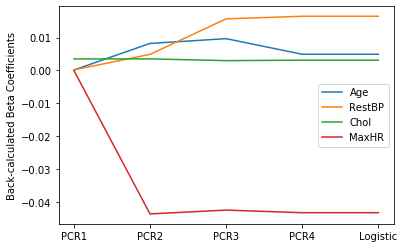

In [12]:
plt.plot(['PCR1' , 'PCR2', 'PCR3', 'PCR4', 'Logistic'],results)

plt.ylabel("Back-calculated Beta Coefficients");

plt.legend(X.columns);

In [13]:
scaler = sk.preprocessing.StandardScaler()
scaler.fit(X)
Z = scaler.transform(X)
pca = PCA(n_components=4).fit(Z)
pcaZ = pca.transform(Z)
pcaZ_df = pd.DataFrame(pcaZ, columns=[['PCA1' , 'PCA2', 'PCA3', 'PCA4']])

print("First PCA Component (w1):",pca.components_[0,:])
print("Second PCA Component (w2):",pca.components_[1,:])

First PCA Component (w1): [-0.66963954 -0.44205566 -0.34186211  0.48918296]
Second PCA Component (w2): [-0.12230603  0.41586468  0.62743557  0.64685579]


In [14]:
#fit the 'full' model on the 4 predictors. and print out the coefficients
logit_full = LogisticRegression(C=1000000,solver="lbfgs").fit(Z,y)


betaZ = logit_full.coef_[0]

print("Logistic coef. on standardized predictors:",betaZ)

Logistic coef. on standardized predictors: [ 0.04450178  0.28984708  0.16162491 -0.98855197]


[[ 0.42924213  0.28335978  0.21913524 -0.31356861]
 [ 0.49643043  0.12456298 -0.02877774 -0.59071642]
 [ 0.49923028  0.07381393  0.01651171 -0.6047242 ]
 [ 0.04450178  0.28984708  0.16162491 -0.98855197]
 [ 0.04450178  0.28984708  0.16162491 -0.98855197]]


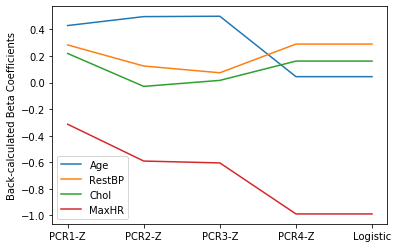

In [15]:
# Fit the PCR
logit_pcr1Z = LogisticRegression(C=1000000,solver="lbfgs").fit(pcaZ_df[['PCA1']],y)
logit_pcr2Z = LogisticRegression(C=1000000,solver="lbfgs").fit(pcaZ_df[['PCA1','PCA2']],y)
logit_pcr3Z = LogisticRegression(C=1000000,solver="lbfgs").fit(pcaZ_df[['PCA1','PCA2','PCA3']],y)
logit_pcr4Z = LogisticRegression(C=1000000,solver="lbfgs").fit(pcaZ_df[['PCA1','PCA2','PCA3','PCA4']],y)

pcr1Z=(logit_pcr1Z.coef_*np.transpose(pca.components_[0:1,:])).sum(axis=1)
pcr2Z=(logit_pcr2Z.coef_*np.transpose(pca.components_[0:2,:])).sum(axis=1)
pcr3Z=(logit_pcr3Z.coef_*np.transpose(pca.components_[0:3,:])).sum(axis=1)
pcr4Z=(logit_pcr4Z.coef_*np.transpose(pca.components_[0:4,:])).sum(axis=1)

resultsZ = np.vstack((pcr1Z,pcr2Z,pcr3Z,pcr4Z,betaZ))
print(resultsZ)

plt.plot(['PCR1-Z' , 'PCR2-Z', 'PCR3-Z', 'PCR4-Z', 'Logistic'],resultsZ)

plt.ylabel("Back-calculated Beta Coefficients");

plt.legend(X.columns);

---